## Long Run Growth
This notebook will look at the long run growth of nations, graphing them, then applying economic concepts to the data to draw interesting conclusions.

First, we import all of the required tools to run our code.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from collections import namedtuple

I used the [Maddison Historical Statistics](https://www.rug.nl/ggdc/historicaldevelopment/maddison/) to source my GDP per capita and population data.

In [3]:
data = pd.read_excel("mpd2020.xlsx" , sheet_name = "Full data")
data.head()

,countrycode,country,year,gdppc,pop
0,AFG,Afghanistan,1820,NaN,3280.0
1,AFG,Afghanistan,1870,NaN,4207.0
2,AFG,Afghanistan,1913,NaN,5730.0
3,AFG,Afghanistan,1950,1156.0,8150.0
4,AFG,Afghanistan,1951,1170.0,8284.0


In [4]:
countries = data.country.unique()
print("There are", len(countries), "countries in the dataset.")
countries

There are 169 countries in the dataset.


array(['Afghanistan', 'Angola', 'Albania', 'United Arab Emirates',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Belarus',
       'Bolivia (Plurinational State of)', 'Brazil', 'Barbados',
       'Botswana', 'Central African Republic', 'Canada', 'Switzerland',
       'Chile', 'China', "Côte d'Ivoire", 'Cameroon', 'D.R. of the Congo',
       'Congo', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Czechoslovakia', 'Cuba', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea',
       'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece',
       'Guatemala', 'China, Hong Kong SAR', 'Honduras', 'Croatia',
       'Haiti', 'Hungary', 

In [5]:
country_years = []
for country in countries:
    cy_data = data[data.country == country]['year']
    ymin, ymax = cy_data.min(), cy_data.max()
    country_years.append((country, ymin, ymax))
country_years = pd.DataFrame(country_years,
                    columns=['country', 'min_year', 'max_year']).set_index('country')
country_years.head()

,min_year,max_year
country,,
Afghanistan,1820,2018
Angola,1950,2018
Albania,1,2018
United Arab Emirates,1950,2018
Argentina,1800,2018


In [6]:
code_to_name = data[
    ['countrycode', 'country']].drop_duplicates().reset_index(drop=True).set_index(['countrycode'])
gdp_pc = data.set_index(['countrycode', 'year'])['gdppc']
gdp_pc = gdp_pc.unstack('countrycode')
gdp_pc.tail()


countrycode,AFG,AGO,ALB,ARE,ARG,ARM,AUS,AUT,AZE,BDI,...,URY,USA,UZB,VEN,VNM,YEM,YUG,ZAF,ZMB,ZWE
year,,,,,,,,,,,,,,,,,,,,,
2014,2022.0000,8673.0000,9808.0000,72601.0000,19183.0000,9735.0000,47867.0000,41338.0000,17439.0000,748.0000,...,19160.0000,51664.0000,9085.0000,20317.0000,5455.0000,4054.0000,14627.0000,12242.0000,3478.0000,1594.0000
2015,1928.0000,8689.0000,10032.0000,74746.0000,19502.0000,10042.0000,48357.0000,41294.0000,17460.0000,694.0000,...,19244.0000,52591.0000,9720.0000,18802.0000,5763.0000,2844.0000,14971.0000,12246.0000,3478.0000,1560.0000
2016,1929.0000,8453.0000,10342.0000,75876.0000,18875.0000,10080.0000,48845.0000,41445.0000,16645.0000,665.0000,...,19468.0000,53015.0000,10381.0000,15219.0000,6062.0000,2506.0000,15416.0000,12139.0000,3479.0000,1534.0000
2017,2014.7453,8146.4354,10702.1201,76643.4984,19200.9061,10859.3783,49265.6135,42177.3706,16522.3072,671.3169,...,19918.1361,54007.7698,10743.8666,12879.1350,6422.0865,2321.9239,15960.8432,12189.3579,3497.5818,1582.3662
2018,1934.5550,7771.4418,11104.1665,76397.8181,18556.3831,11454.4251,49830.7993,42988.0709,16628.0553,651.3589,...,20185.8360,55334.7394,11220.3702,10709.9506,6814.1423,2284.8899,16558.3123,12165.7948,3534.0337,1611.4052


In [7]:
country_names = data['countrycode']
colors = cm.tab20(np.linspace(0, 1, len(country_names)))
color_mapping = {
    country: color for country, color in zip(country_names, colors)
}

## GDP per capita as a standard of living
Now we have the tools to look at the GDP of countries over their existing lifespan, and compare those GDPs against those of other countries. First, we will look at per-capita GDP as a standard of living, then overall GDP as a measure of a the power of a country.

In [8]:
# Plotting the GDP of China, US, UK and Germany
def draw_plots(series, country, ylabel, xlabel, color_mapping, code_to_name, lw, logscale, ax):

    for c in country:
        #Interpolate data for nonexistent datapoints
        df_interpolated = series[c].interpolate(limit_area = 'inside')
        interpolated_data = df_interpolated[series[c].isnull()]

        #Plot interpolated data
        ax.plot(interpolated_data, linestyle="--", color=color_mapping[c], lw=lw, alpha = 0.7)

        #Plot non interpolated data
        ax.plot(series[c], lw=lw, color= color_mapping[c], alpha = 0.8, label = code_to_name.loc[c]['country'])

        #Set scale
        if logscale:
            ax.set_yscale('log')

    #Set labels and legend
    ax.legend(loc='upper left', frameon=False)
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)


In [9]:
#Find the country codes for China, US, and Germany
countries_to_codes = ['China', 'United States', 'Germany']
codes = []
for country in countries_to_codes:
    codes.append(code_to_name.loc[code_to_name['country'] == country].index[0])
print(codes)


['CHN', 'USA', 'DEU']


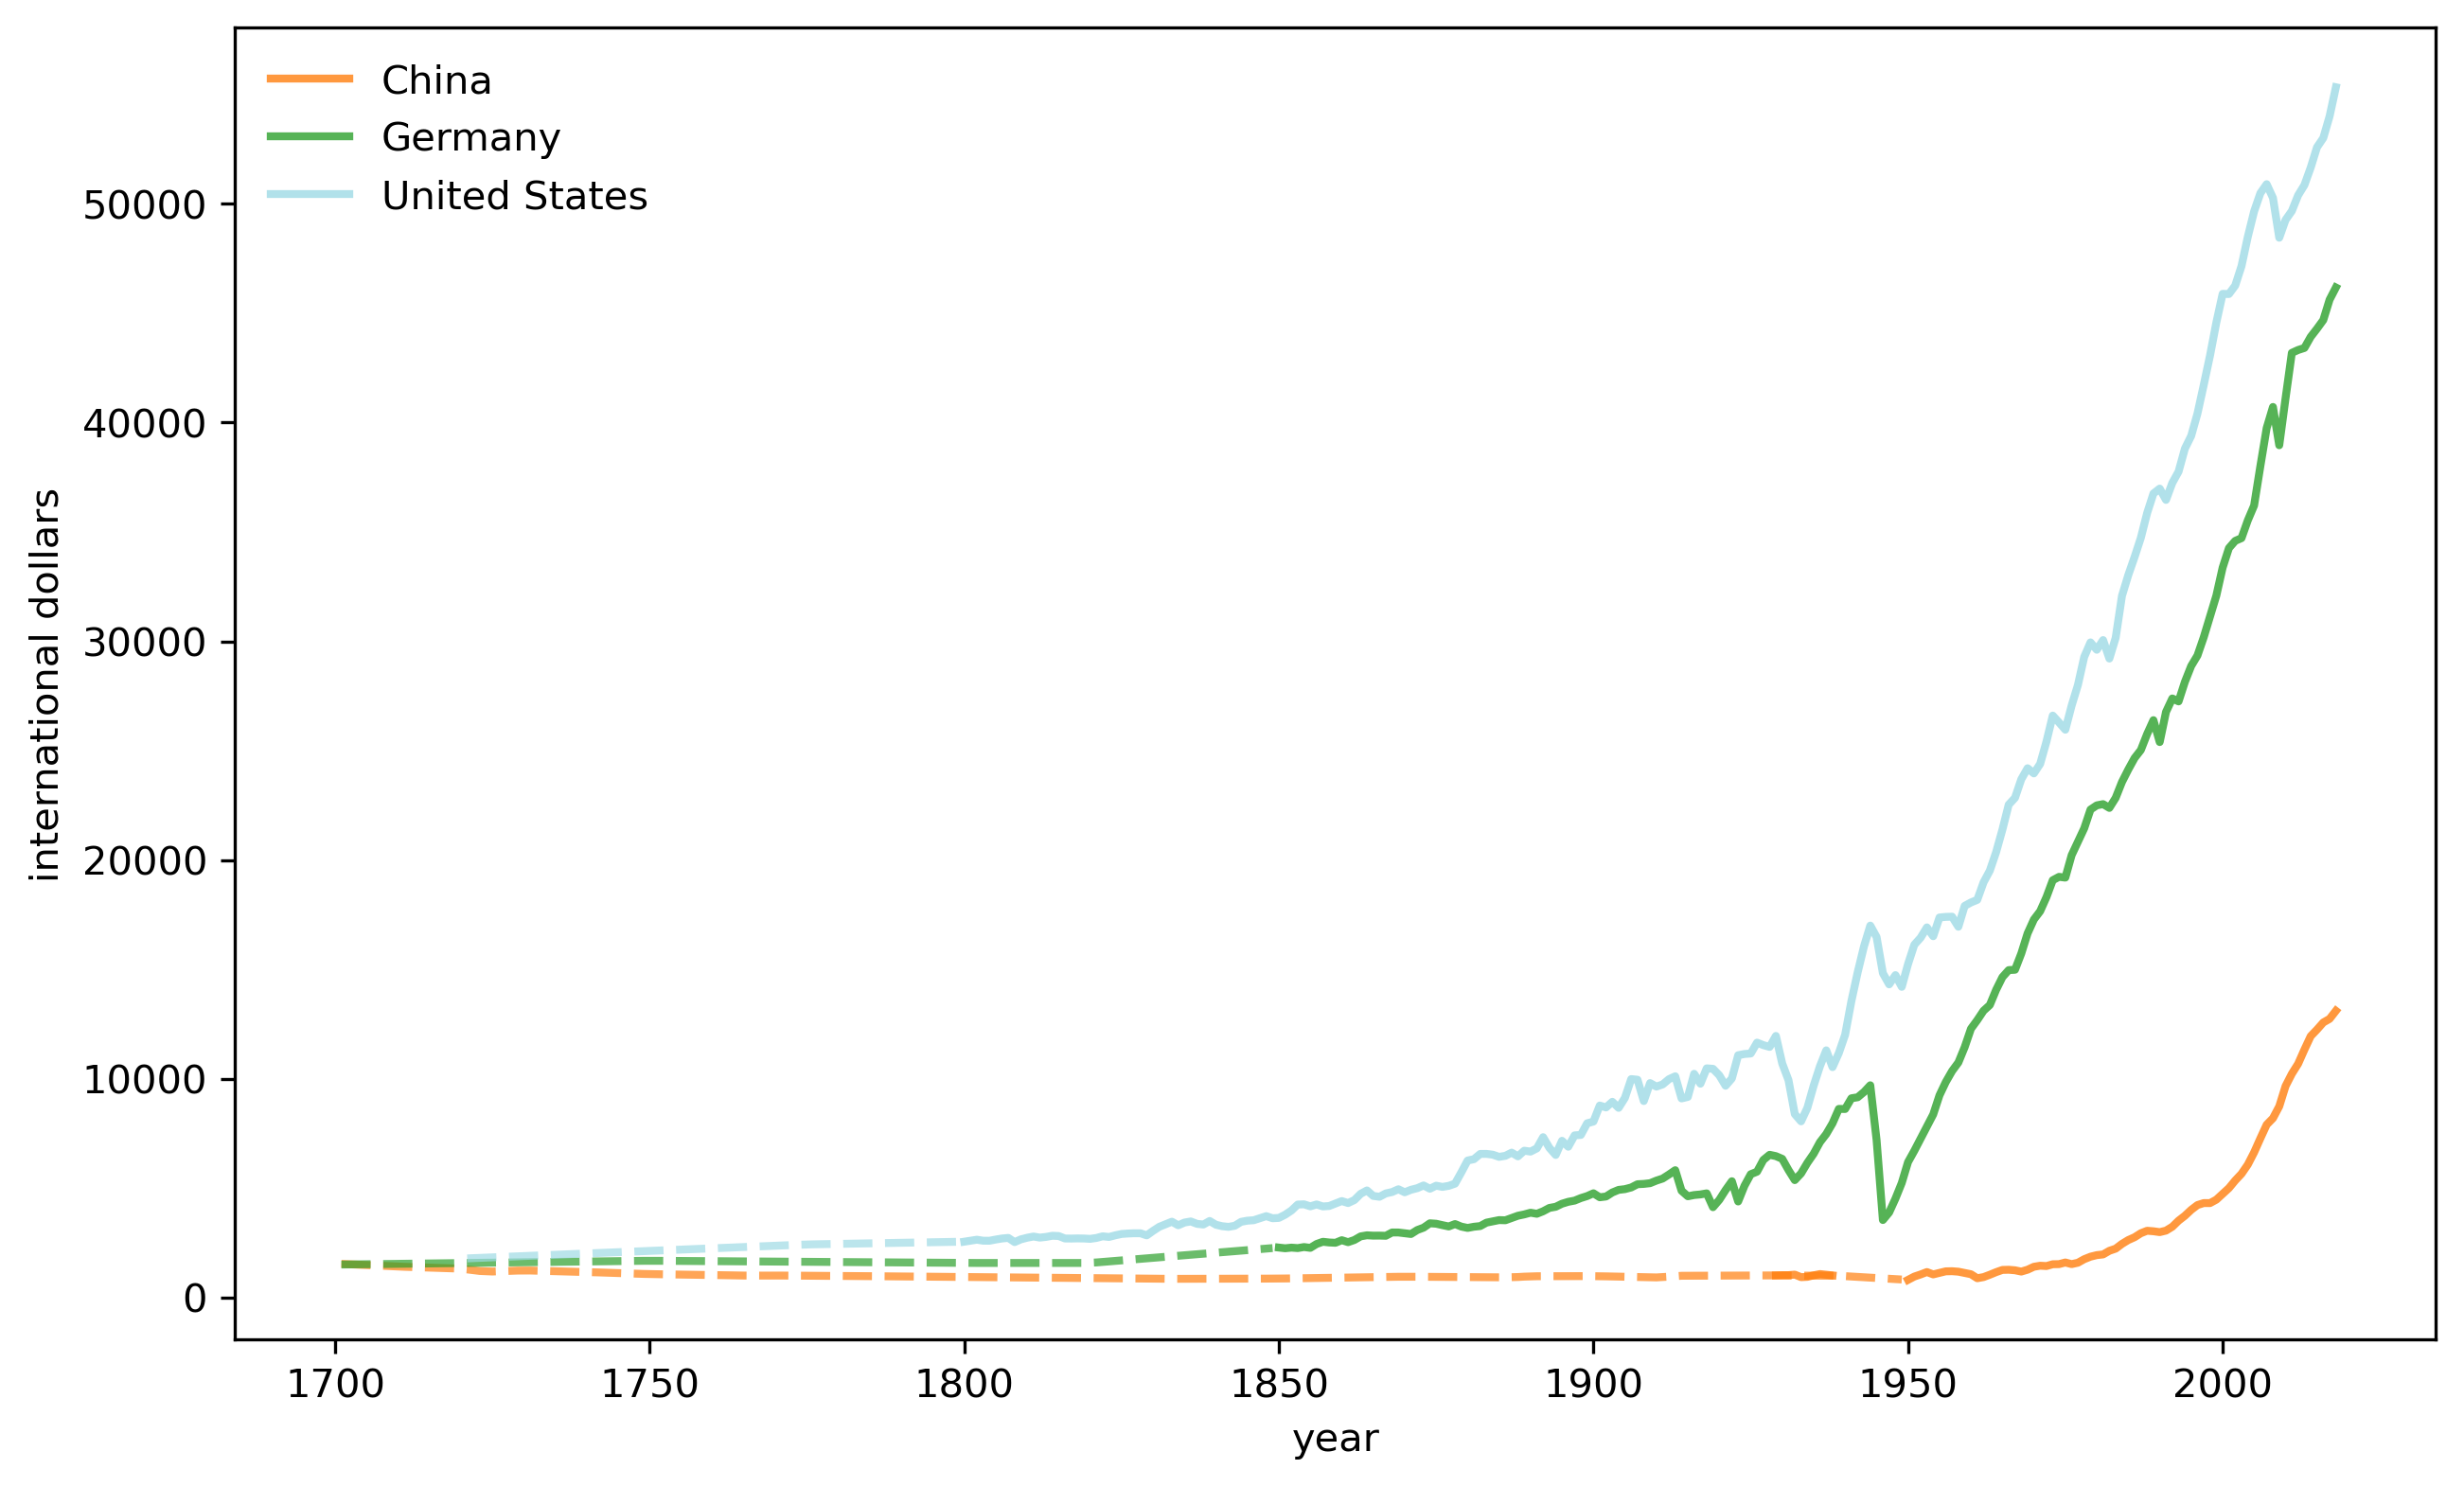

In [10]:
fig, ax = plt.subplots(dpi=300, figsize=(10, 6))
country = ['CHN', 'DEU', 'USA']
draw_plots(gdp_pc[country].loc[1700:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

Now, lets put some major global events on the graph and look at how they affect the GDP per capita of China, Germany, and the US.

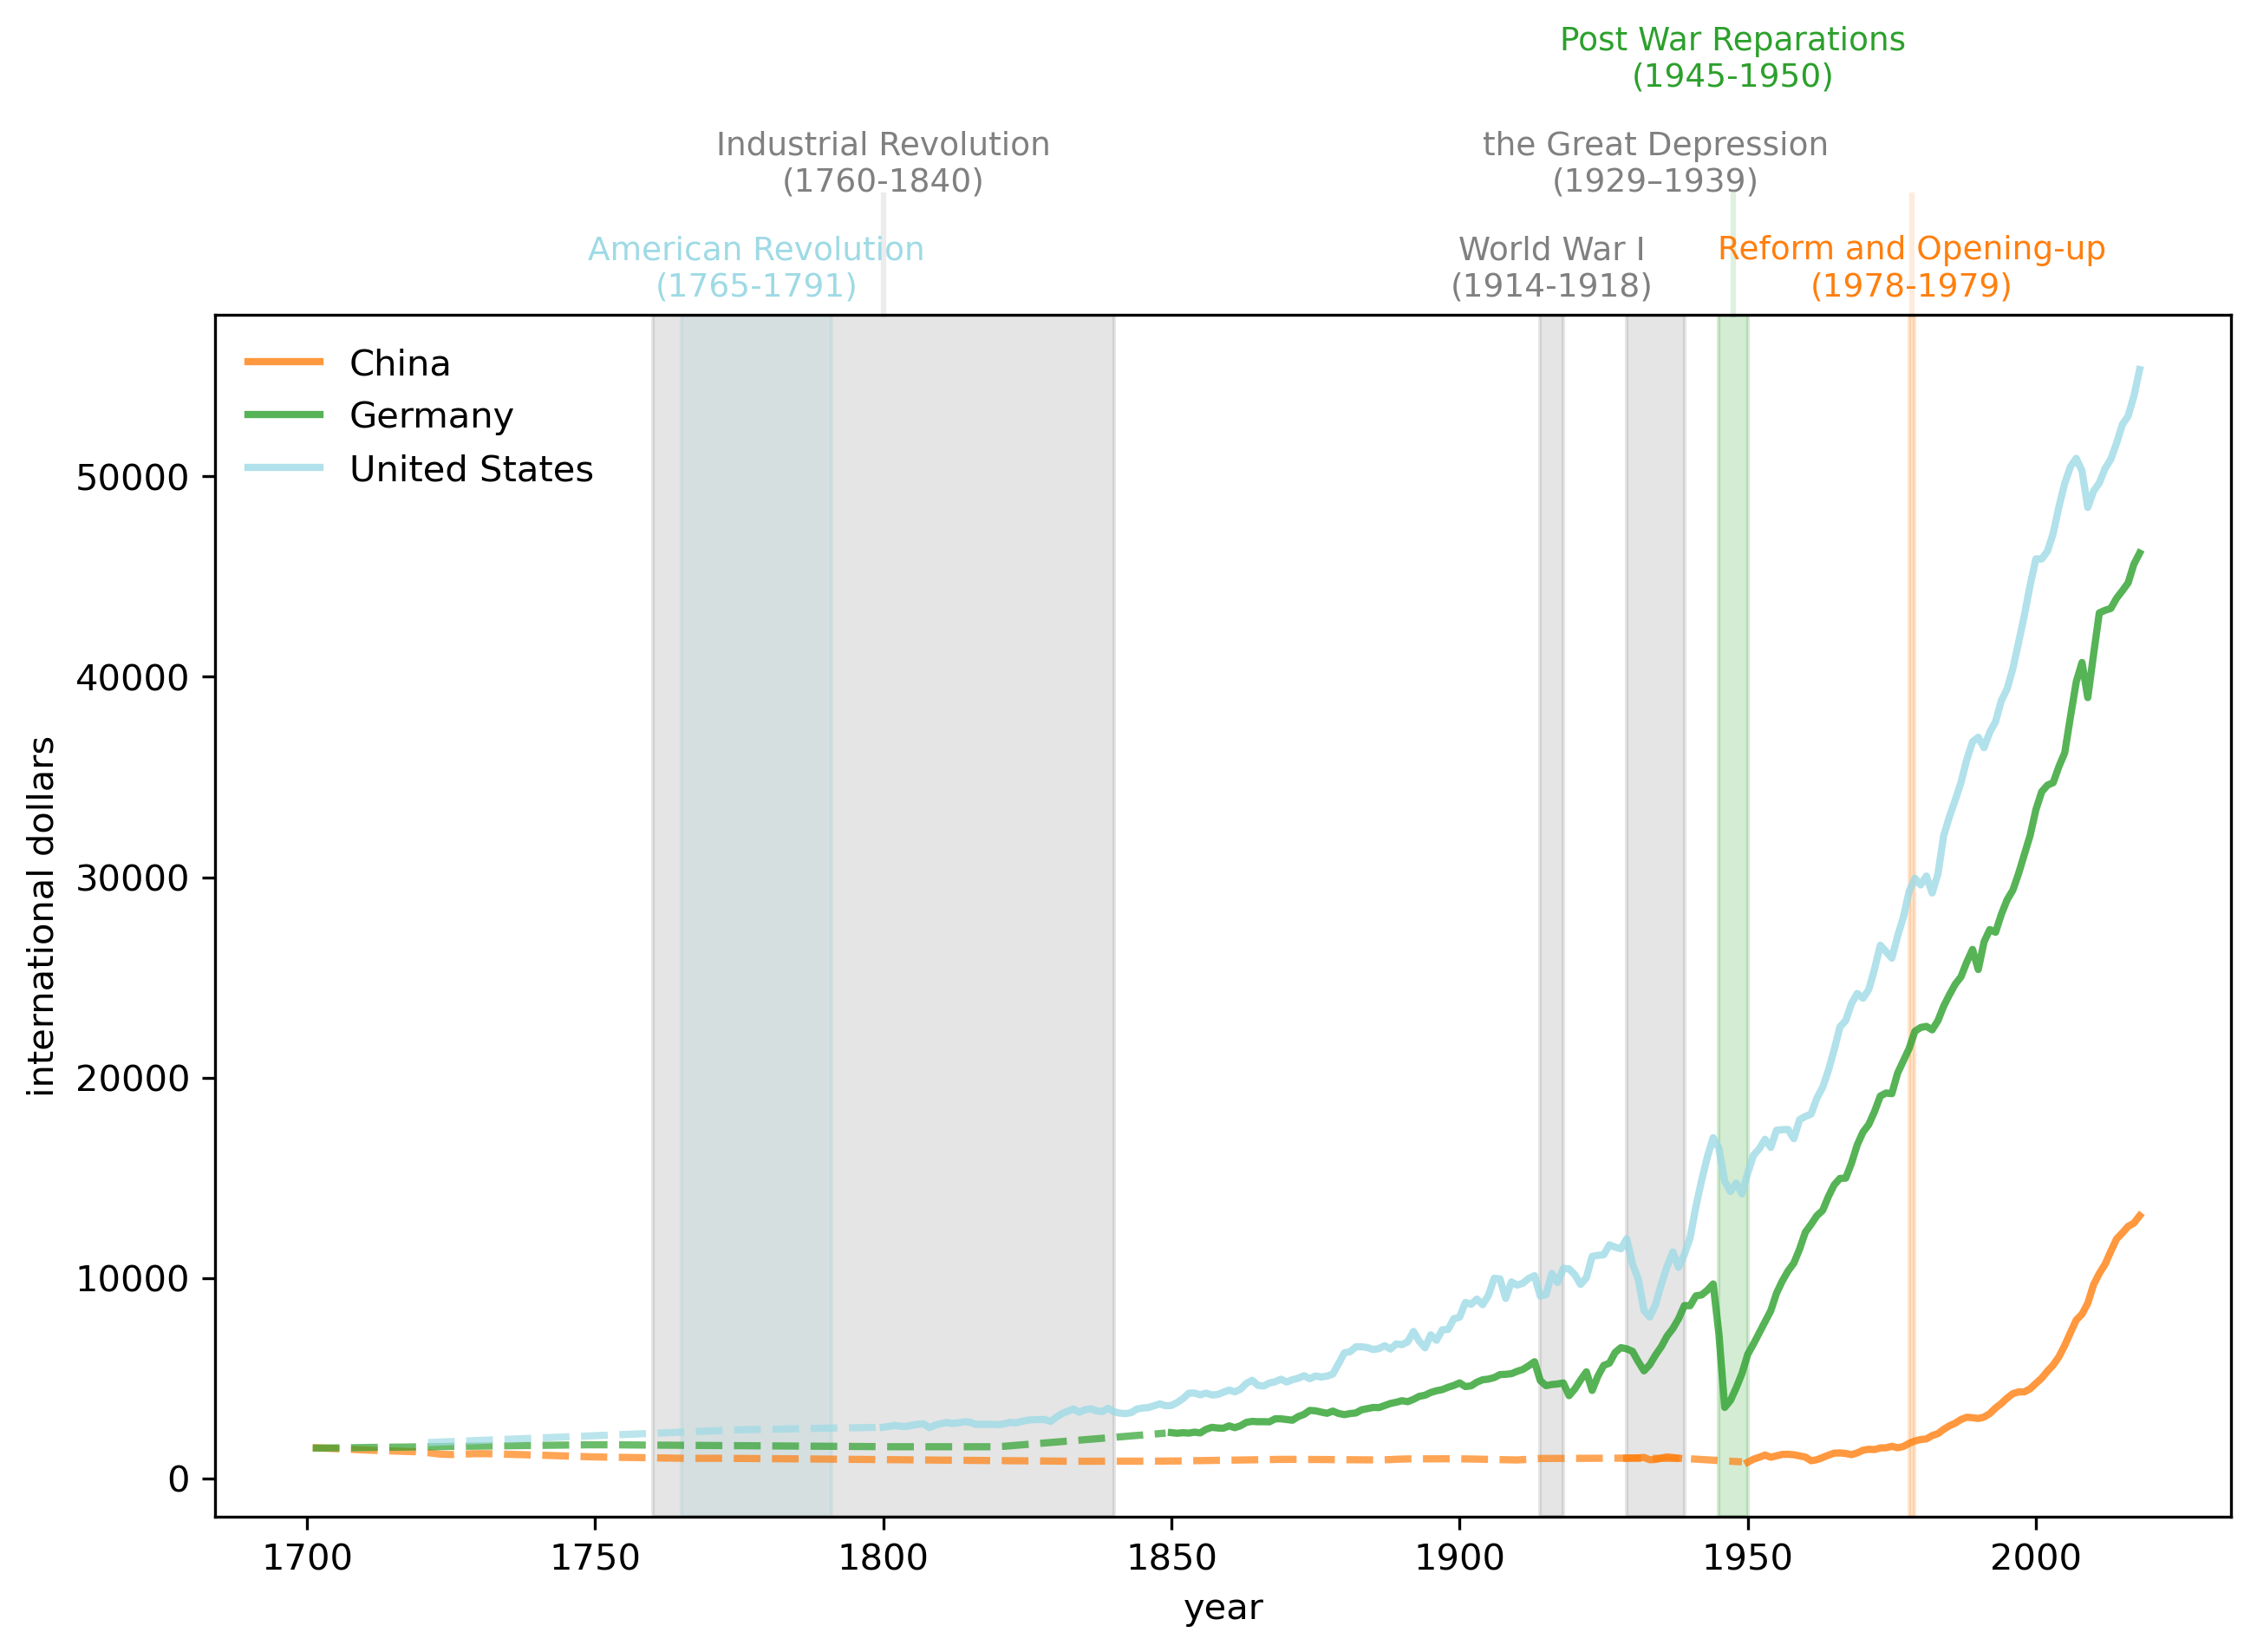

In [11]:
# Define the namedtuple for the events
Event = namedtuple('Event', ['year_range', 'y_text', 'text', 'color', 'ymax'])

fig, ax = plt.subplots(dpi=300, figsize=(10, 6))

country = ['CHN', 'DEU', 'USA']
draw_plots(gdp_pc[country].loc[1700:], 
                  country,
                  'international dollars','year',
                  color_mapping, code_to_name, 2, False, ax)

# Define the parameters for the events and the text
ylim = ax.get_ylim()[1]
b_params = {'color':'grey', 'alpha': 0.2}
t_params = {'fontsize': 9, 
            'va':'center', 'ha':'center'}

# Create a list of events to annotate
events = [
    Event((1765, 1791), ylim + ylim*0.04, 
          'American Revolution\n(1765-1791)', 
          color_mapping['USA'], 1),
    Event((1760, 1840), ylim + ylim*0.13, 
          'Industrial Revolution\n(1760-1840)', 
          'grey', 1.1),
    Event((1914,1918), ylim + ylim*0.04, 
          'World War I\n(1914-1918)', 
          'grey', 1),
    Event((1929, 1939), ylim + ylim*0.13, 
          'the Great Depression\n(1929–1939)', 
          'grey', 1),
    Event((1945,1950), ylim + ylim*0.22,
          'Post War Reparations\n(1945-1950)', 
          color_mapping['DEU'], 1.1),
    Event((1978, 1979), ylim + ylim*0.04, 
          'Reform and Opening-up\n(1978-1979)', 
          color_mapping['CHN'], 1.1)
]

def draw_events(events, ax):
    # Iterate over events and add annotations and vertical lines
    for event in events:
        event_mid = sum(event.year_range)/2
        ax.text(event_mid, 
                event.y_text, event.text, 
                color=event.color, **t_params)
        ax.axvspan(*event.year_range, color=event.color, alpha=0.2)
        ax.axvline(event_mid, ymin=1, ymax=event.ymax, color=event.color,
                   clip_on=False, alpha=0.15)

# Draw events
draw_events(events, ax)
plt.show()

Through this graph, we can see the effects of different global events on the GDP per capita of different countries. We can see economic growth in the US and Germany starting during the Industrial Revolution, and growth starting in China from when the country opened up. We also see the effects of WW1, the Great Depression, and Post-WW2 on the US and Germany.

## GDP as Geopolitical-Military Power
Now, instead of looking at GDP per capita, we look at a countries overall GDP as a representation of their power. We will look at the trends of global powers, such as the US, the "British Empire", and the extreme growth of China within the past century.

In [12]:
#Calculate the gdp for all countries
data = pd.read_excel("mpd2020.xlsx", sheet_name='Full data')
data.set_index(['countrycode', 'year'], inplace=True)
data['gdp'] = data['gdppc'] * data['pop']
gdp = data['gdp'].unstack('countrycode')
data.head()

country   gdppc     pop        gdp
countrycode year                                        
AFG         1820  Afghanistan     NaN  3280.0        NaN
            1870  Afghanistan     NaN  4207.0        NaN
            1913  Afghanistan     NaN  5730.0        NaN
            1950  Afghanistan  1156.0  8150.0  9421400.0
            1951  Afghanistan  1170.0  8284.0  9692280.0

In [13]:
#Create the British Empire
BEM = ['GBR', 'IND', 'AUS', 'NZL', 'CAN', 'ZAF']
start_year, end_year = (1820, 1945)
#Interpolate incomplete time-series
gdp['BEM'] = gdp[BEM].loc[start_year-1:end_year].interpolate(method='index').sum(axis=1)
color_mapping['BEM'] = color_mapping['GBR']  #Use the same color as the UK
bem = pd.DataFrame(["British Empire"], index=["BEM"], columns=['country'])
bem.index.name = 'countrycode'
code_to_name = pd.concat([code_to_name, bem])



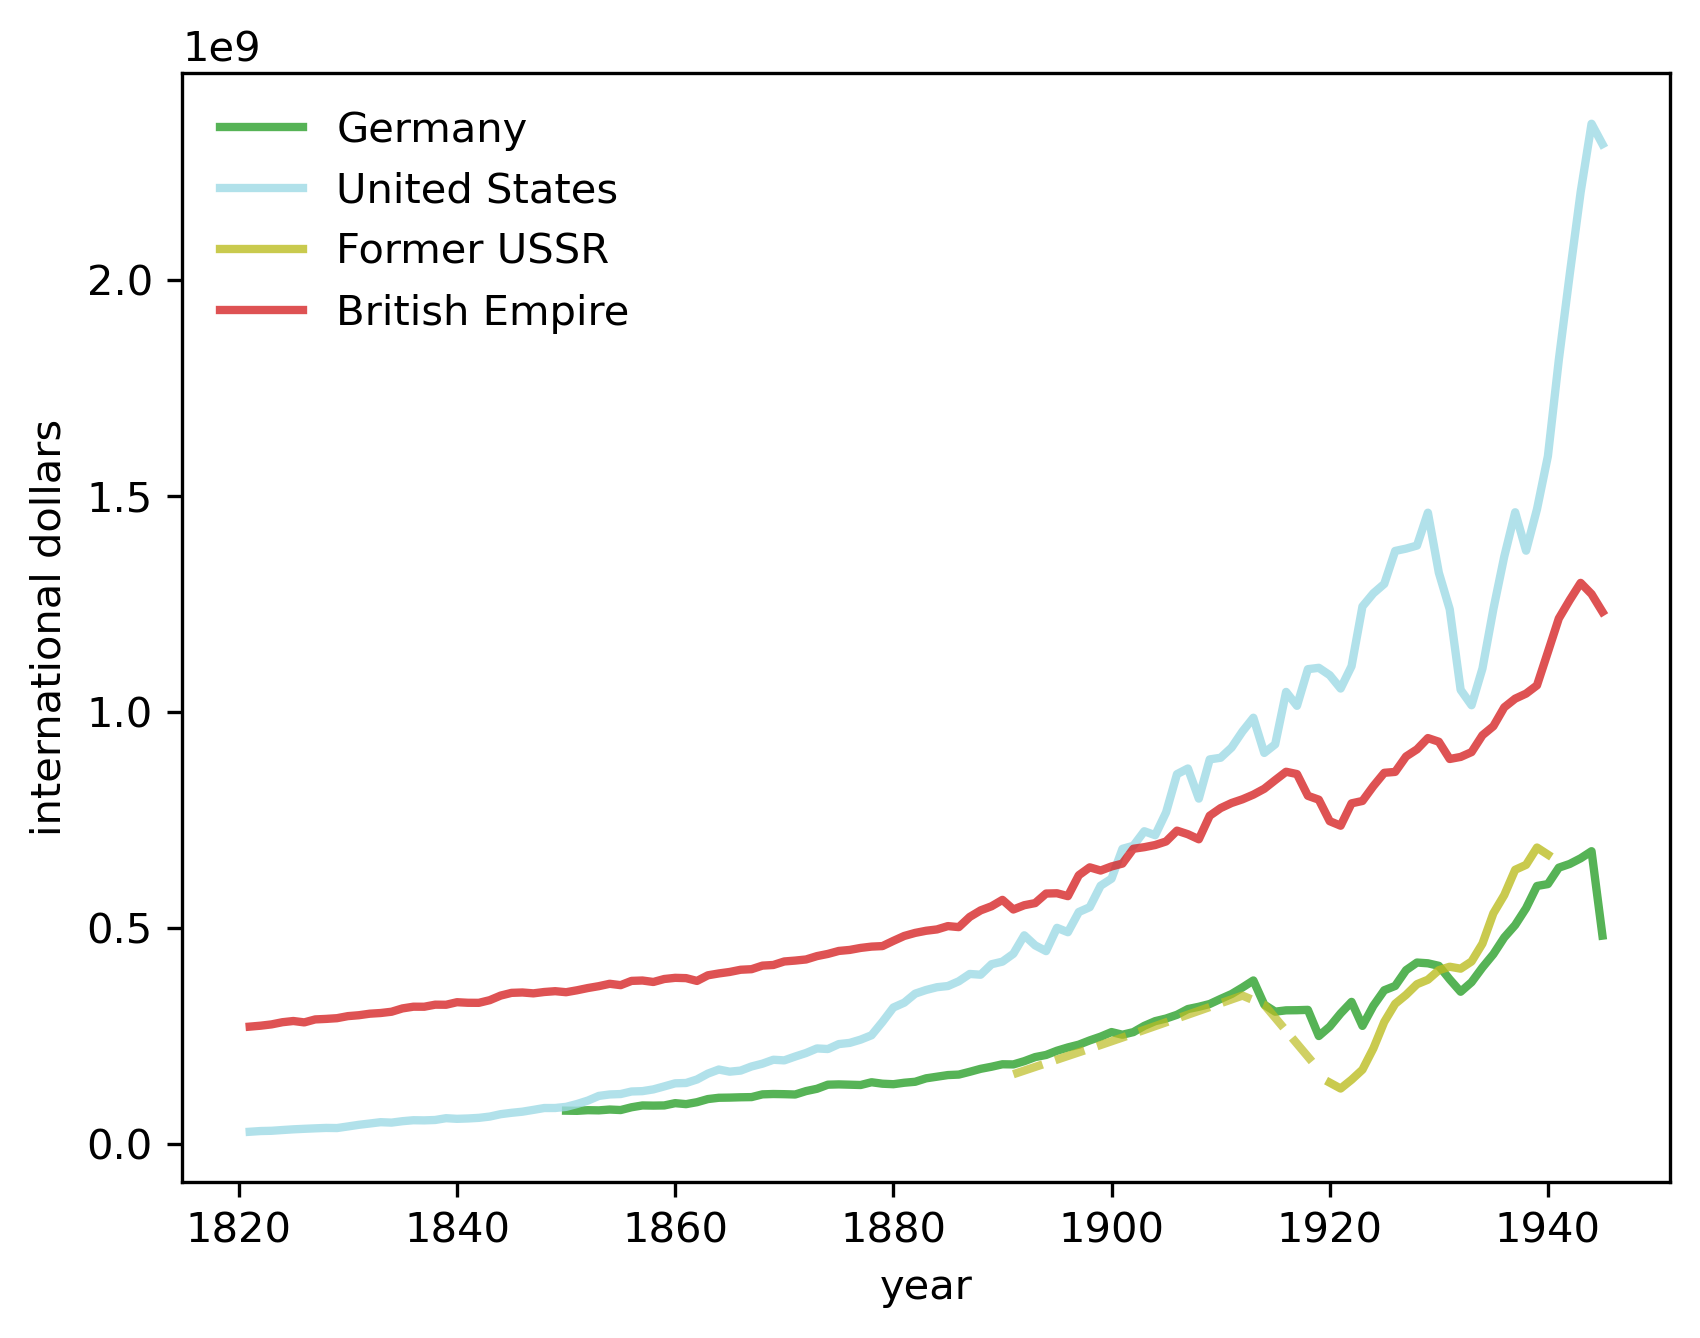

In [14]:
fig, ax = plt.subplots(dpi=300)
country = ['DEU', 'USA', 'SUN', 'BEM']
start_year, end_year = (1821, 1945)
draw_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)
plt.show()

We can see that for the longest time, the British Empire is the dominant power in the world, but is passed by the US at the end of the 19th century, fueled by the rise of industrial america.

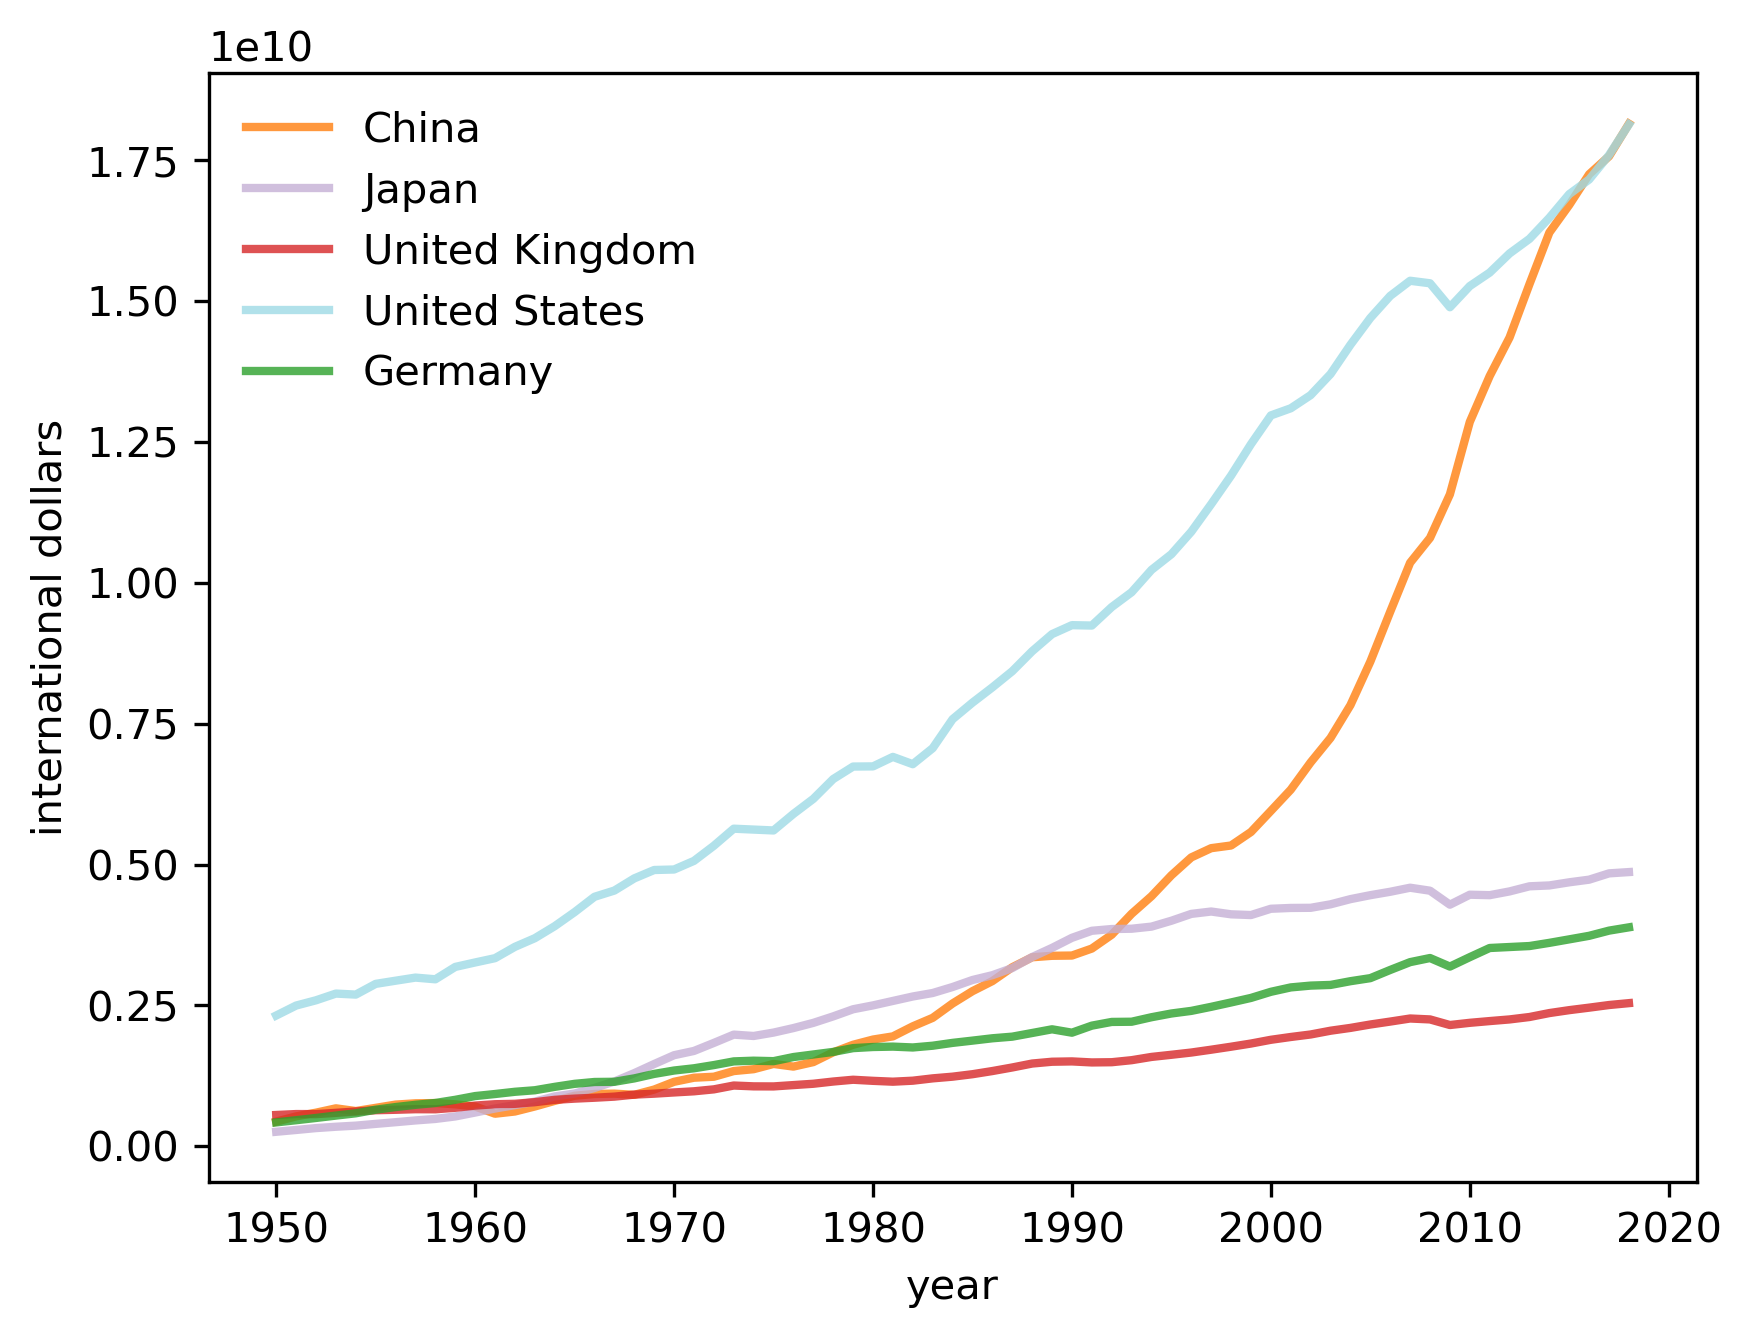

In [15]:
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'JPN', 'GBR', 'USA','DEU']
start_year, end_year = (1950, 2020)
draw_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

## GDP of China and the US
We now look at the growth rate of the US and China, and use the data we currently have to see what the future could look like.

In [26]:
print("The overall gdp growth from 1950-2020 for China is " + str(np.round(100 * gdp['CHN'].loc[2018]/gdp['CHN'].loc[1950], 3 )) + "%.")

#Calculate the average growth rate of the GDP of a country per year
def calc_avg_growth(gdp, country_code, start_year, end_year):
    initial_value = gdp[country_code].loc[start_year]
    final_value = gdp[country_code].loc[end_year]
    number_of_years = end_year - start_year - 1
    average_growth_rate = (final_value / initial_value) ** (1 / number_of_years) - 1
    return average_growth_rate
print("The gdp growth rate from 1950-2020 for China is " + str(np.round(100*calc_avg_growth(gdp, 'CHN', 1950, 2018),3)) + "%.")
print("The overall gdp growth from 1950-2020 for the US is " + str(np.round(100 * gdp['USA'].loc[2018]/gdp['USA'].loc[1950], 3 )) + "%.")
print("The gdp growth rate from 1950-2020 for the US is " + str(np.round(100*calc_avg_growth(gdp, 'USA', 1950, 2018),3)) + "%.")



The overall gdp growth from 1950-2020 for China is 4154.59%.
The gdp growth rate from 1950-2020 for China is 5.72%.
The overall gdp growth from 1950-2020 for the US is 781.719%.
The gdp growth rate from 1950-2020 for the US is 3.117%.


In [32]:
print(gdp['USA'].loc[2018]/gdp['CHN'].loc[2018])
usa_gpd_in50 = gdp['USA'].loc[2018] * np.power(1 + calc_avg_growth(gdp, 'CHN', 1950, 2018),50)
chn_gpd_in50 = gdp['CHN'].loc[2018] * np.power(1 + calc_avg_growth(gdp, 'USA', 1950, 2018),50)
print(usa_gpd_in50/chn_gpd_in50)

0.9993953678165834
3.476470536314627


year
2064    2.345005e+11
2065    2.479139e+11
2066    2.620946e+11
2067    2.770864e+11
2068    2.929357e+11
Name: CHN, dtype: float64


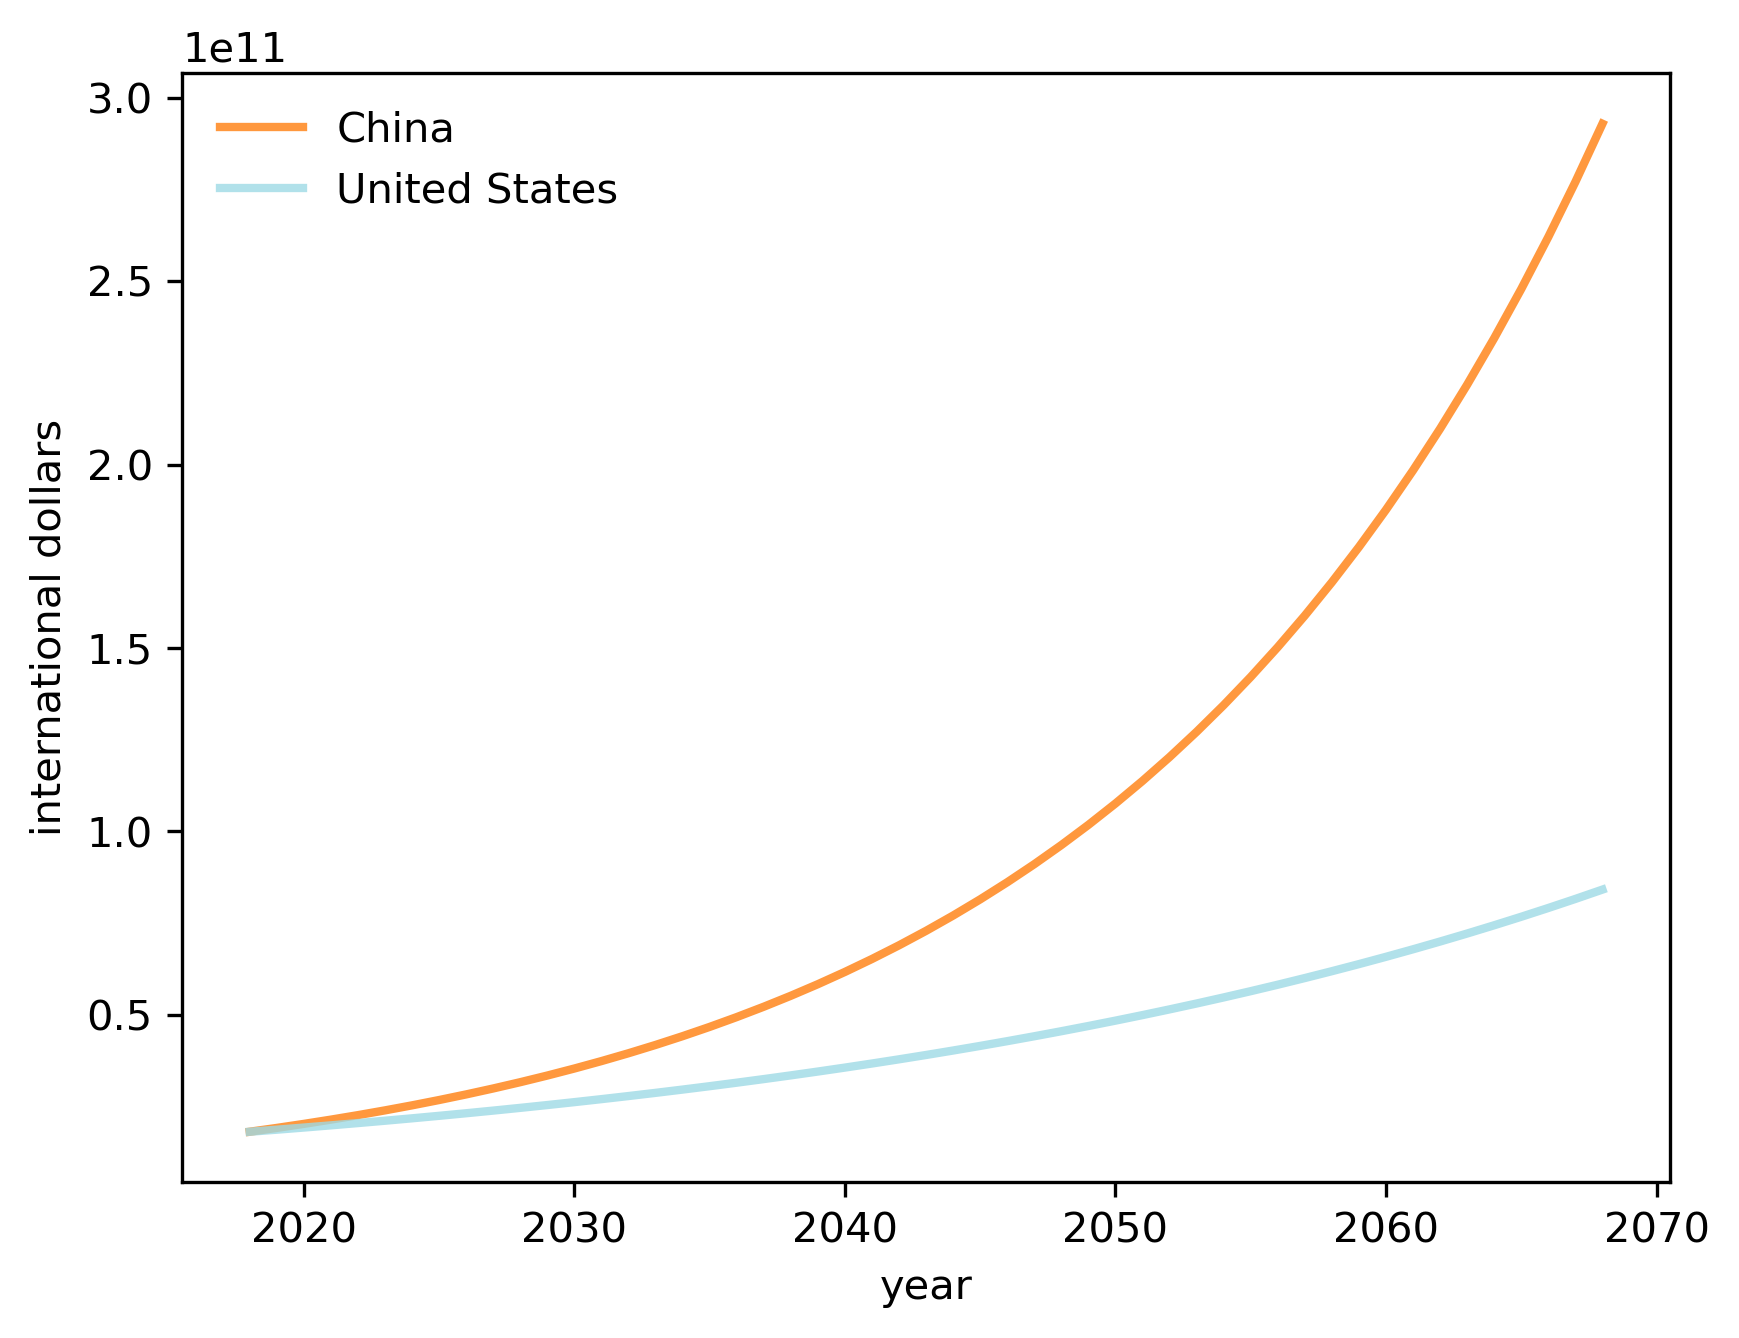

In [49]:

for i in range(1,51):
    gdp.loc[2018 + i, 'USA'] = [gdp['USA'].loc[2018] * np.power(1 + calc_avg_growth(gdp, 'USA', 1950, 2018), i)]
    gdp.loc[2018 + i, 'CHN'] = [gdp['CHN'].loc[2018] * np.power(1 + calc_avg_growth(gdp, 'CHN', 1950, 2018), i)]
print(gdp['CHN'].tail())
fig, ax = plt.subplots(dpi=300)
country = ['CHN', 'USA']
start_year, end_year = (2018, 2018+50)
draw_plots(gdp[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)

In the past 70 years, China's GDP has grown an unprecedented 4154.59%, increasing 5.72% each year. Both of these growth rates dwarf the US. As of 2018, the PPP GDP of both China and the US were essentially equivalent, and if the two countries followed the same growth rates, in 50 years, China's economy would be 3.5x the size of the US economy. If this growth followed, then the gap in GDP would only increase more, as growth rates are nultiplicative. However, we must keep in mind that the population of China is also much higher than the population of the US, and growing much more rapidly as well.

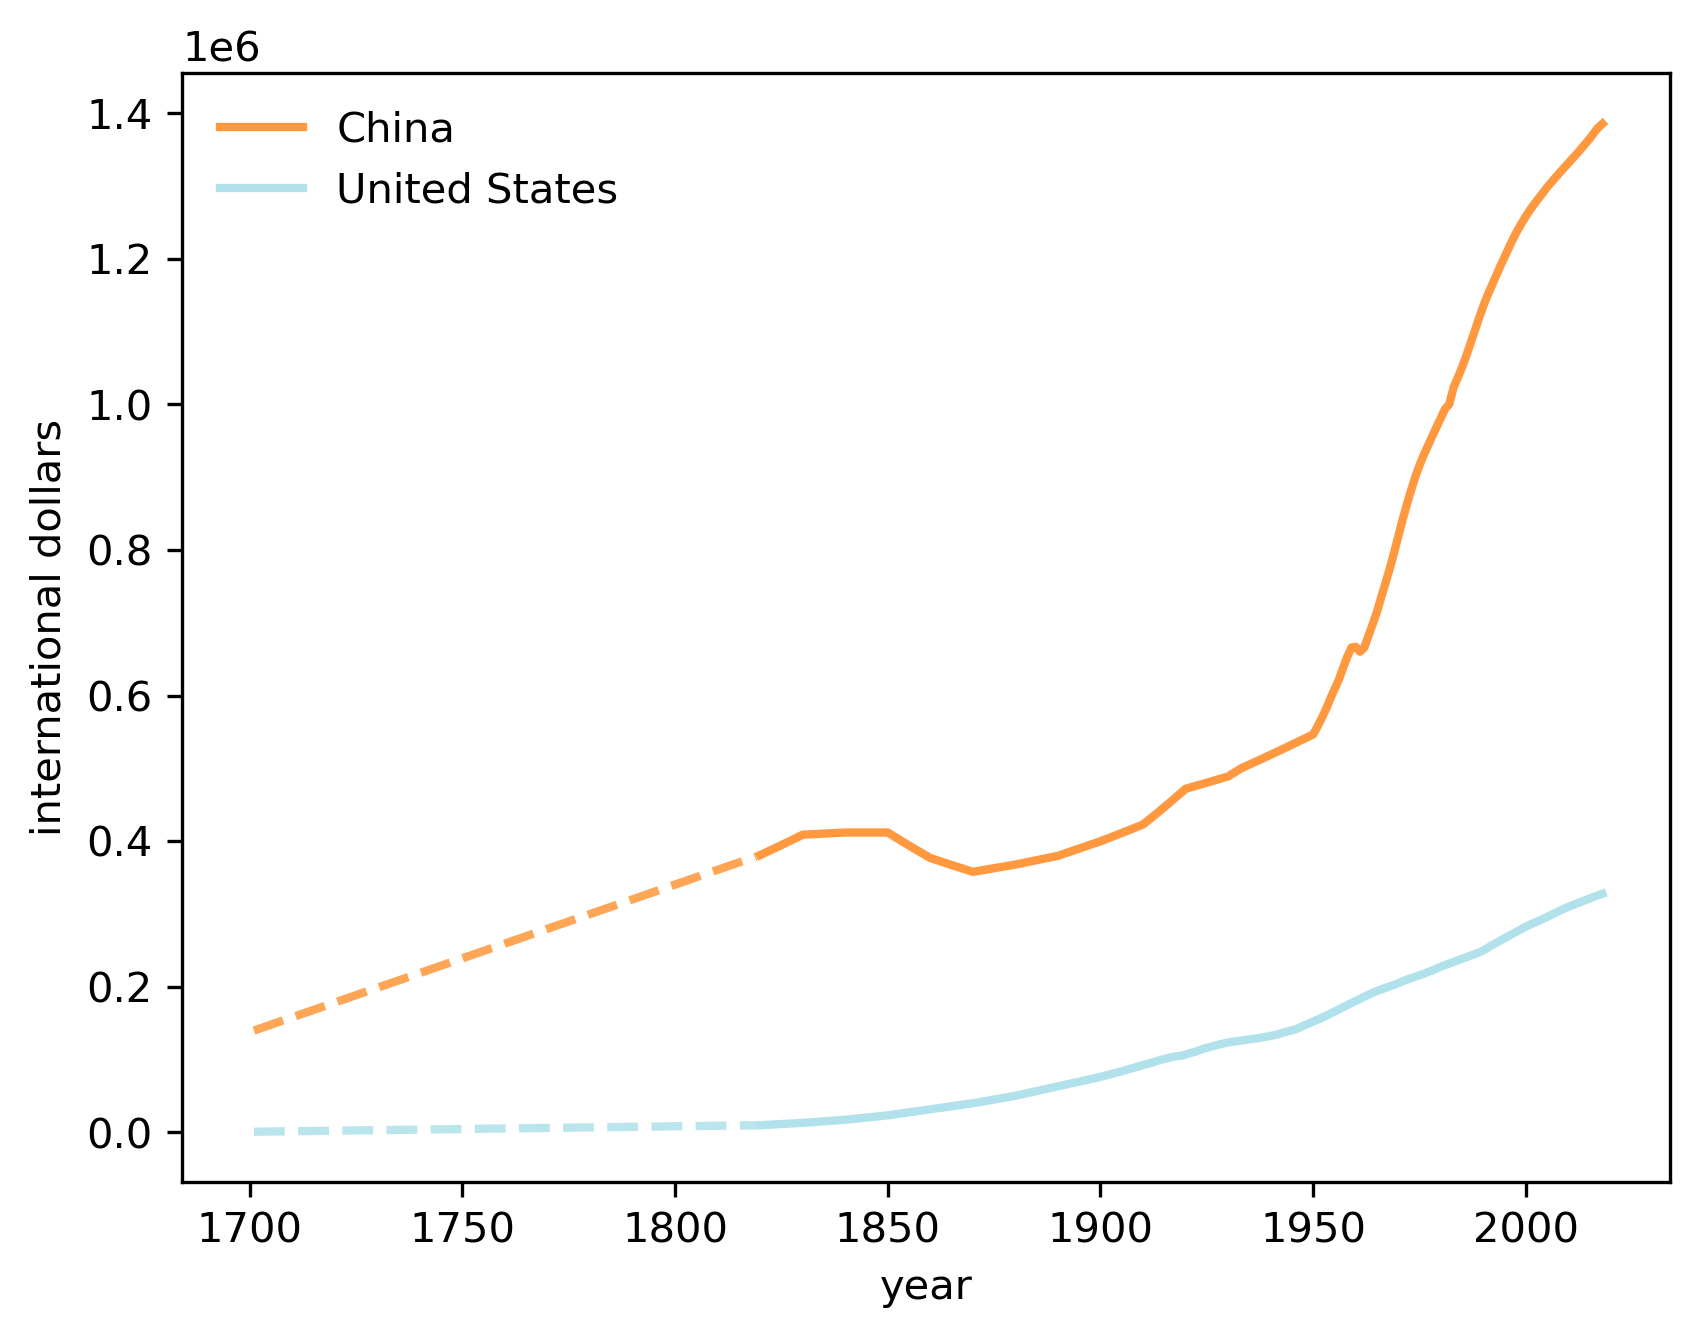

In [55]:
fig, ax = plt.subplots(dpi=300)
pop = data['pop'].unstack('countrycode')
country = ['CHN', 'USA']
start_year, end_year = (1700, 2018)
draw_plots(pop[country].loc[start_year:end_year], 
                  country,
                  'international dollars', 'year',
                  color_mapping, code_to_name, 2, False, ax)


## GDP of Regions of the World
Another action we can take is to look at the regional GDP per capita to see the quality of life in certain regions of the world as time has passed.

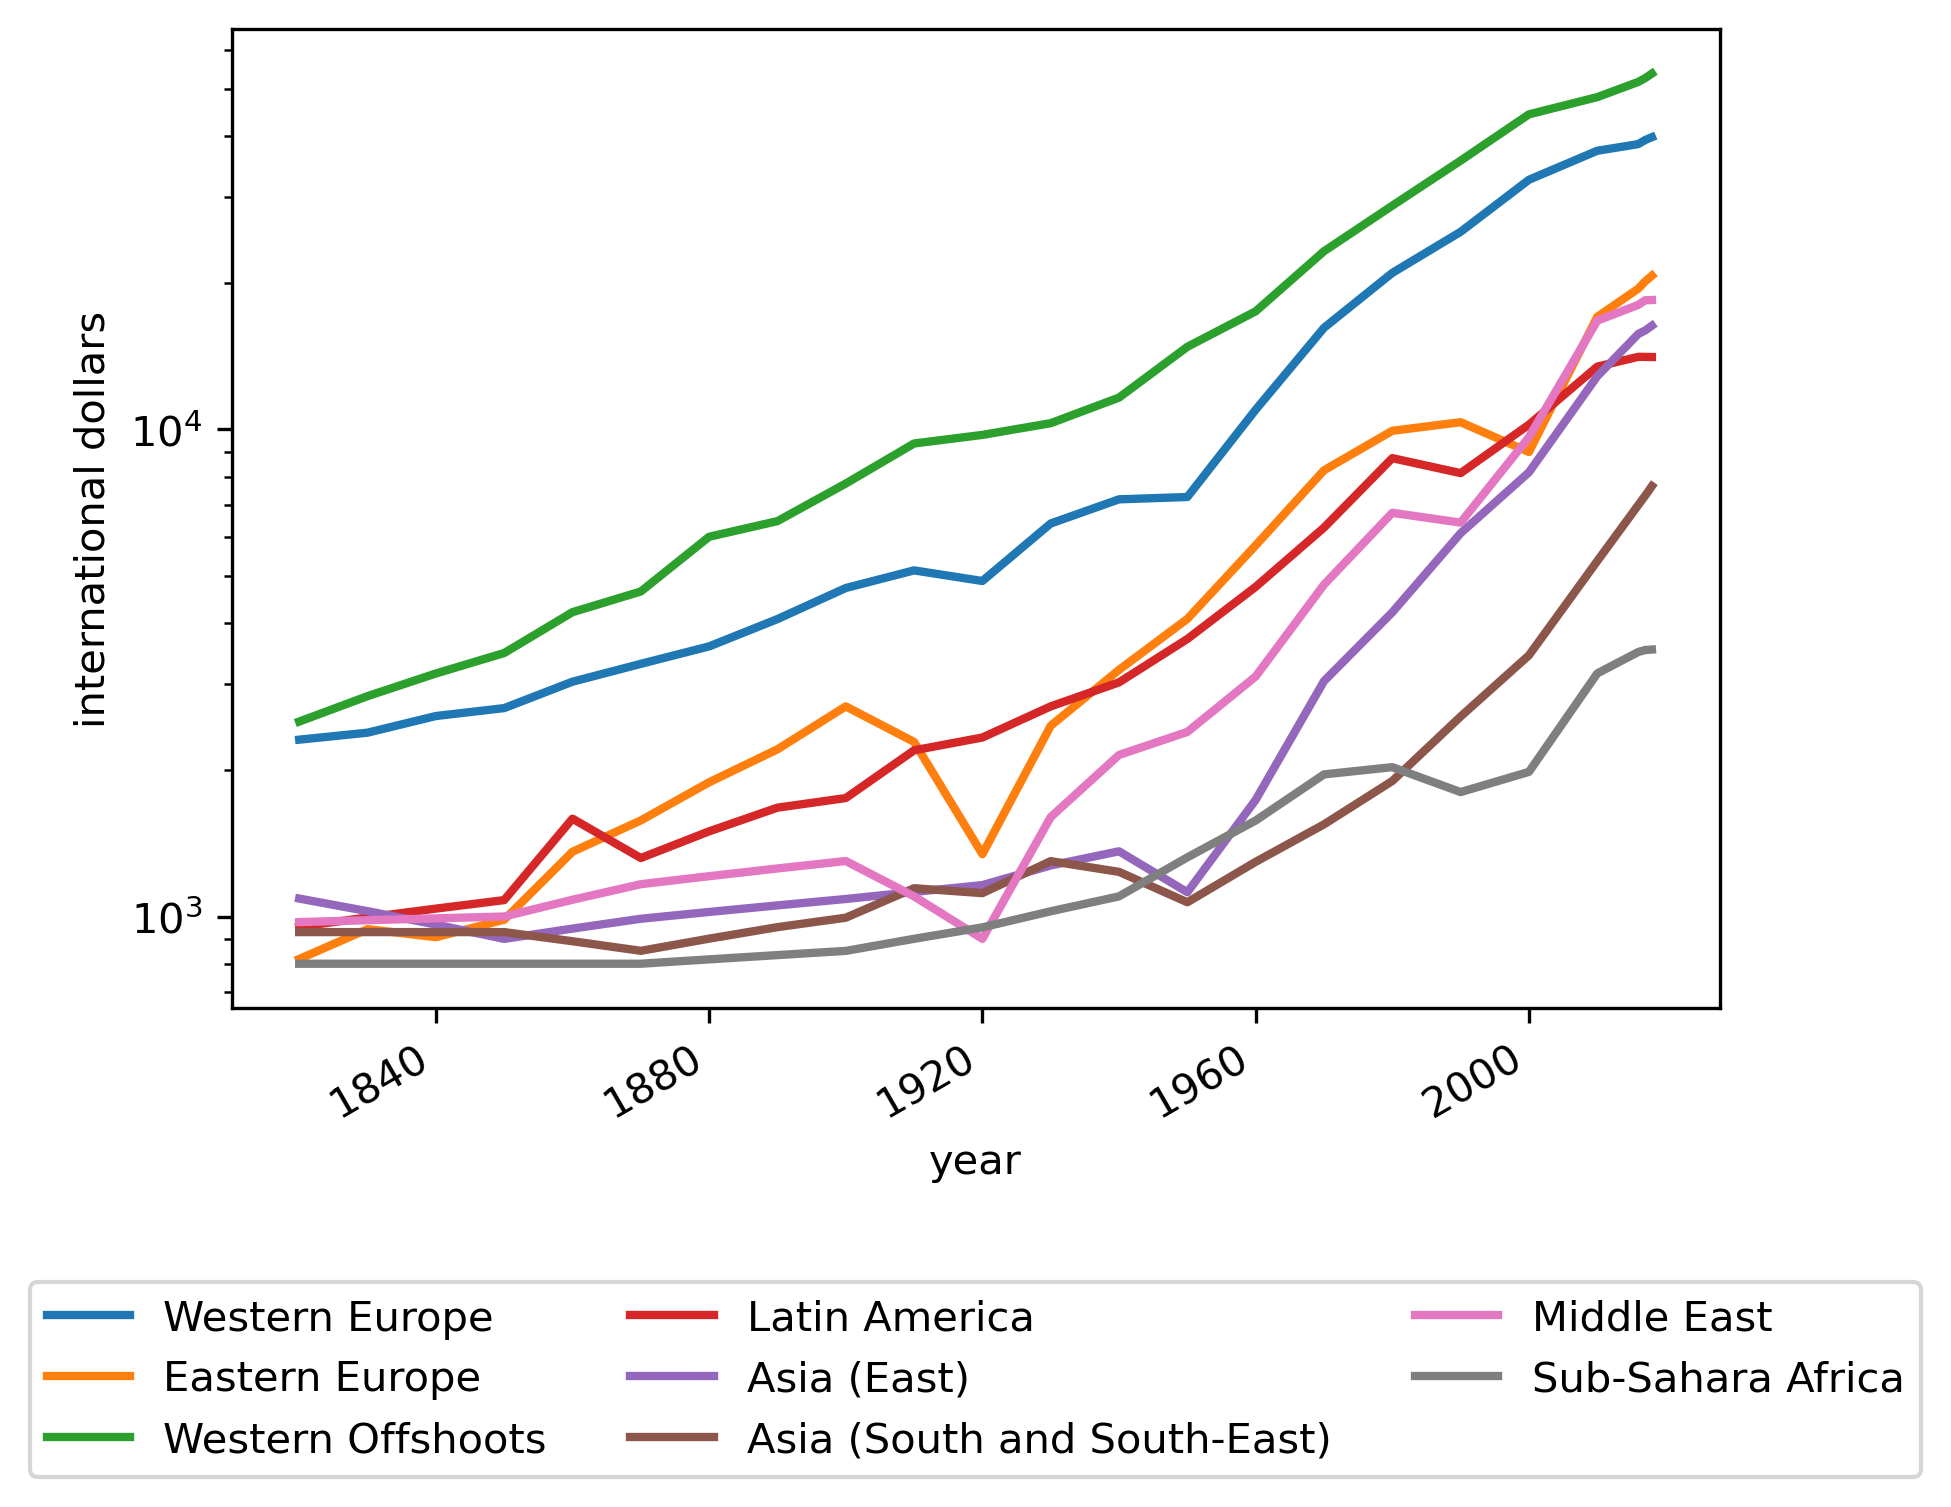

In [60]:
#Import the data
data = pd.read_excel('mpd2020.xlsx', 
                     sheet_name='Regional data', 
                     header=(0,1,2),
                     index_col=0)
data.columns = data.columns.droplevel(level=2)

#Save the data as a single table
regionalgdp_pc = data['GDP pc 2011 prices'].copy()
regionalgdp_pc.index = pd.to_datetime(regionalgdp_pc.index, format='%Y')

#Interpolate missing data
regionalgdp_pc.interpolate(method='time', inplace=True)

fig, ax = plt.subplots(dpi=300)
regionalgdp_pc.plot(ax=ax, xlabel='year',
                    lw=2,
                    ylabel='international dollars')
ax.set_yscale('log')
plt.legend(loc='lower center',
           ncol=3, bbox_to_anchor=[0.5, -0.5])
plt.show()


We can see the separation of the West from the rest of the world, as well as the rapid growth in all of Asia. Also note the slow growth of Sub-Saharan Africa.